## Naive Baye's ML Algorithm

Naive Bayes and its variants can be applied to classification problems where feature independence is assumed. Bernoulli works best for binary or boolean features, Multinomial for count-based data like text, and Gaussian for continuous data that follows a normal distribution.

Since the Iris dataset has continuous features like sepal and petal measurements, I'll use GaussianNB, which is specifically designed for continuous data under the assumption of normal distribution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
X,y = load_iris(return_X_y=True)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
gnb = GaussianNB()

In [9]:
gnb.fit(X_train,y_train)

GaussianNB()

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
y_pred = gnb.predict(X_test)

Accuracy:  1.0
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

----------------------------------------------------------------------------


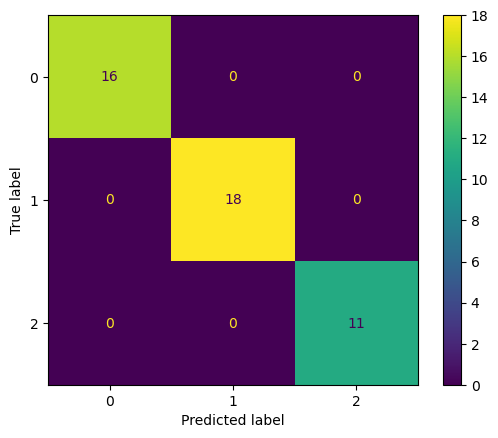

In [12]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: ",score)
print("----------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------------------------")
cm = confusion_matrix(y_test,y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(values_format='')
plt.show()

### For tips dataset

Considering the time as the output variable

In [13]:
df = sns.load_dataset('tips')

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [30]:
for column in df.columns:
    if df[column].dtype == 'category':
        print(f"{df[column].value_counts()}")
        print("-"*40)

sex
Male      157
Female     87
Name: count, dtype: int64
----------------------------------------
smoker
No     151
Yes     93
Name: count, dtype: int64
----------------------------------------
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
----------------------------------------
time
Dinner    176
Lunch      68
Name: count, dtype: int64
----------------------------------------


In [16]:
X = df[['total_bill', 'tip', 'sex', 'smoker', 'day', 'size']]
y = df['time']

In [31]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [34]:
# Encoding the categorical features features 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(drop='first'), [2,3,4])],
                  remainder='passthrough')

In [35]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [39]:
import sys
np.set_printoptions(threshold=sys.maxsize)
X_train

array([[ 1.  ,  1.  ,  1.  ,  0.  ,  0.  , 13.81,  2.  ,  2.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , 18.64,  1.36,  3.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  , 34.81,  5.2 ,  4.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  , 16.45,  2.47,  2.  ],
       [ 1.  ,  0.  ,  1.  ,  0.  ,  0.  , 13.37,  2.  ,  2.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , 18.26,  3.25,  2.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  8.51,  1.25,  2.  ],
       [ 1.  ,  1.  ,  1.  ,  0.  ,  0.  , 11.59,  1.5 ,  2.  ],
       [ 1.  ,  0.  ,  1.  ,  0.  ,  0.  , 16.04,  2.24,  3.  ],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  , 18.43,  3.  ,  4.  ],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  , 23.68,  3.31,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  , 17.26,  2.74,  3.  ],
       [ 1.  ,  0.  ,  1.  ,  0.  ,  0.  , 19.82,  3.18,  2.  ],
       [ 1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  9.55,  1.45,  2.  ],
       [ 1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  7.74,  1.44,  2.  ],
       [ 1.  ,  1.  ,  1.

In [40]:
X_test

array([[ 1.  ,  0.  ,  1.  ,  0.  ,  0.  , 17.59,  2.64,  3.  ],
       [ 1.  ,  1.  ,  1.  ,  0.  ,  0.  , 18.29,  3.76,  4.  ],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  , 19.49,  3.51,  2.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  7.25,  1.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  , 16.27,  2.5 ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  5.75,  1.  ,  2.  ],
       [ 1.  ,  1.  ,  1.  ,  0.  ,  0.  , 17.92,  3.08,  2.  ],
       [ 1.  ,  1.  ,  0.  ,  1.  ,  0.  , 23.33,  5.65,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  1.  ,  0.  , 18.15,  3.5 ,  3.  ],
       [ 1.  ,  1.  ,  0.  ,  1.  ,  0.  , 34.65,  3.68,  4.  ],
       [ 0.  ,  1.  ,  1.  ,  0.  ,  0.  , 25.28,  5.  ,  2.  ],
       [ 1.  ,  1.  ,  1.  ,  0.  ,  0.  , 25.21,  4.29,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  , 14.07,  2.5 ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  1.  , 13.  ,  2.  ,  2.  ],
       [ 1.  ,  1.  ,  0.  ,  0.  ,  0.  , 13.42,  1.58,  2.  ],
       [ 1.  ,  0.  ,  0.

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [44]:
for i,label in enumerate(le.classes_):
    print(f"{i} : {label}")

0 : Dinner
1 : Lunch


In [47]:
y_test = le.transform(y_test)

In [48]:
from sklearn.naive_bayes import BernoulliNB

In [49]:
bnb = BernoulliNB()

In [50]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [51]:
y_pred = bnb.predict(X_test)

Accuracy:  0.918918918918919
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        56
           1       0.93      0.72      0.81        18

    accuracy                           0.92        74
   macro avg       0.92      0.85      0.88        74
weighted avg       0.92      0.92      0.92        74

----------------------------------------------------------------------------


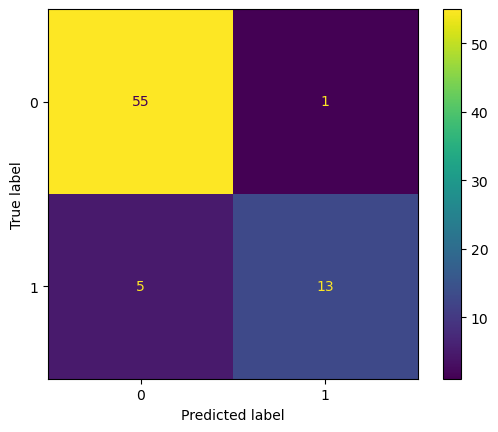

In [52]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: ",score)
print("----------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------------------------")
cm = confusion_matrix(y_test,y_pred, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bnb.classes_)
disp.plot(values_format='')
plt.show()